## Name : Pratik Sontakke
## College : Ajeenkya DY Patil University
## Task 3 : Car Price Prediction With Machine Learning

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") 
import string

In [2]:
ps = pd.read_csv('Cars Dataset.csv')  #importing the dataset
ps 

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
ps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
print(ps.notnull().sum()) 

car_ID              205
symboling           205
CarName             205
fueltype            205
aspiration          205
doornumber          205
carbody             205
drivewheel          205
enginelocation      205
wheelbase           205
carlength           205
carwidth            205
carheight           205
curbweight          205
enginetype          205
cylindernumber      205
enginesize          205
fuelsystem          205
boreratio           205
stroke              205
compressionratio    205
horsepower          205
peakrpm             205
citympg             205
highwaympg          205
price               205
dtype: int64


In [5]:
cp=ps.dropna()
cp

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


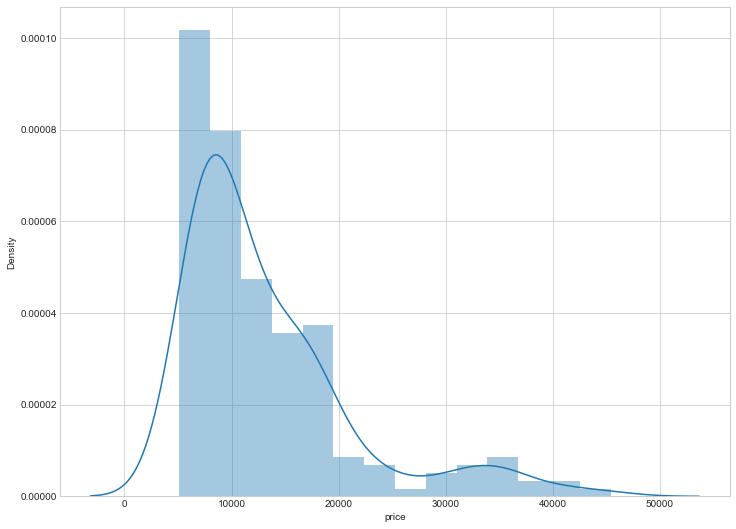

In [6]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,9))            #size of the plot
sns.distplot(cp.price)
plt.show()

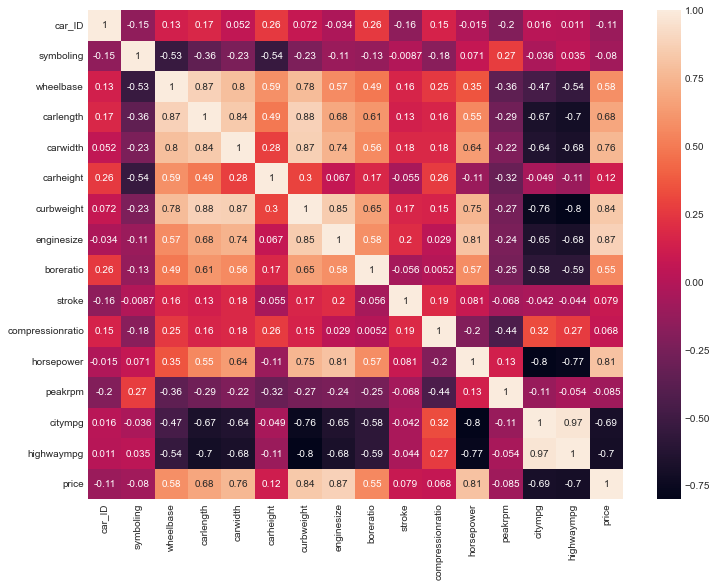

In [7]:
plt.style.use('seaborn-whitegrid')
plt.figure(figsize=(12,9))            #size of the plot
sns.heatmap(cp.corr(),annot=True)
plt.show()

In [8]:
print(cp.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

In [9]:
cp=cp.drop(columns=['CarName','enginesize','fuelsystem','boreratio','stroke','enginelocation','enginetype', 'cylindernumber'])
cp

,car_ID,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,wheelbase,carlength,carwidth,carheight,curbweight,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,9.0,111,5000,21,27,13495.0
1,2,3,gas,std,two,convertible,rwd,88.6,168.8,64.1,48.8,2548,9.0,111,5000,21,27,16500.0
2,3,1,gas,std,two,hatchback,rwd,94.5,171.2,65.5,52.4,2823,9.0,154,5000,19,26,16500.0
3,4,2,gas,std,four,sedan,fwd,99.8,176.6,66.2,54.3,2337,10.0,102,5500,24,30,13950.0
4,5,2,gas,std,four,sedan,4wd,99.4,176.6,66.4,54.3,2824,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,2952,9.5,114,5400,23,28,16845.0
201,202,-1,gas,turbo,four,sedan,rwd,109.1,188.8,68.8,55.5,3049,8.7,160,5300,19,25,19045.0
202,203,-1,gas,std,four,sedan,rwd,109.1,188.8,68.9,55.5,3012,8.8,134,5500,18,23,21485.0
203,204,-1,diesel,turbo,four,sedan,rwd,109.1,188.8,68.9,55.5,3217,23.0,106,4800,26,27,22470.0


### Data Preprocessing

In [10]:
cp.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [11]:
categorical_features=[col for col in cp.columns if cp[col].dtype=='O']
categorical_features

['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel']

In [12]:
numerical_features=[col for col in cp.columns if cp[col].dtype!='O']
numerical_features

['car_ID',
 'symboling',
 'wheelbase',
 'carlength',
 'carwidth',
 'carheight',
 'curbweight',
 'compressionratio',
 'horsepower',
 'peakrpm',
 'citympg',
 'highwaympg',
 'price']

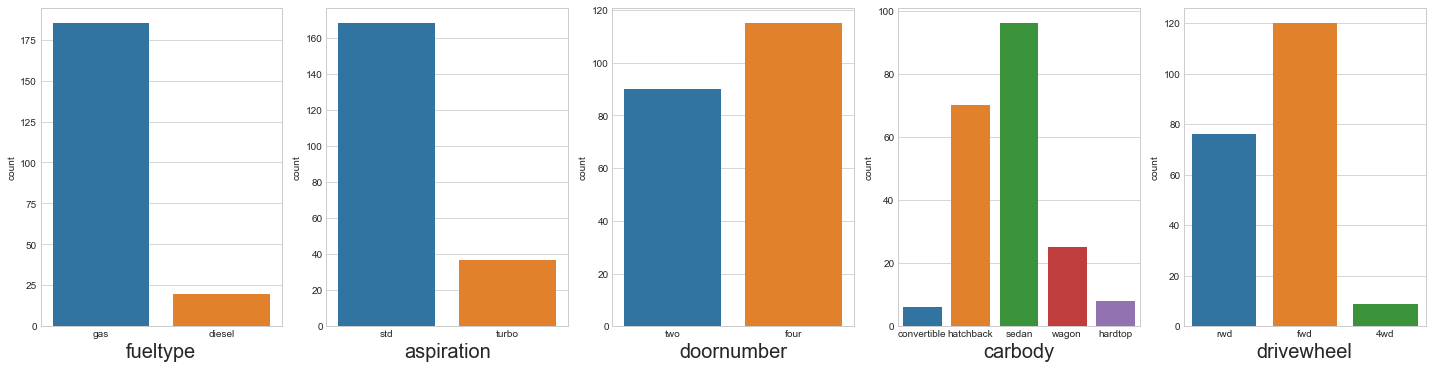

In [13]:
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in categorical_features:
    if plotnumber<=9:
        ax=plt.subplot(5,5,plotnumber)
        sns.countplot(x=column,data=cp)
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.tight_layout()

In [14]:
data=pd.get_dummies(cp)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   car_ID               205 non-null    int64  
 1   symboling            205 non-null    int64  
 2   wheelbase            205 non-null    float64
 3   carlength            205 non-null    float64
 4   carwidth             205 non-null    float64
 5   carheight            205 non-null    float64
 6   curbweight           205 non-null    int64  
 7   compressionratio     205 non-null    float64
 8   horsepower           205 non-null    int64  
 9   peakrpm              205 non-null    int64  
 10  citympg              205 non-null    int64  
 11  highwaympg           205 non-null    int64  
 12  price                205 non-null    float64
 13  fueltype_diesel      205 non-null    uint8  
 14  fueltype_gas         205 non-null    uint8  
 15  aspiration_std       205 non-null    uin

In [15]:
feature=["symboling","wheelbase","carlength","carwidth","carheight","curbweight","compressionratio","horsepower","peakrpm",              
"citympg","highwaympg","fueltype_diesel","fueltype_gas", "aspiration_std","aspiration_turbo","doornumber_four","doornumber_two",
"carbody_convertible","carbody_hardtop","carbody_hatchback","carbody_sedan","carbody_wagon","drivewheel_4wd",
"drivewheel_fwd","drivewheel_rwd"]
x=data[feature]
y=data.price

## Linear Regression

In [16]:
from sklearn.linear_model import LinearRegression
lr= LinearRegression()
from sklearn import metrics 
from sklearn.model_selection import train_test_split

In [17]:
x_train, x_test , y_train , y_test= train_test_split(x,y,test_size=0.3,random_state=5)
lr.fit(x_train,y_train)
ypred =lr.predict(x_test) 
lr.score(x_train,y_train)

0.8354687739241226

In [18]:
lr.score(x_test,y_test)

0.8304547453394551

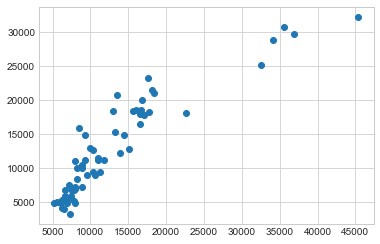

In [19]:
plt.scatter(y_test,ypred)

In [20]:
from sklearn.metrics import mean_absolute_error
lr.score(x_test, ypred)

1.0